In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns

In [24]:
df = pd.read_csv('online_retail_customer_churn.csv')

In [25]:
df.head()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Annual_Income               1000 non-null   float64
 4   Total_Spend                 1000 non-null   float64
 5   Years_as_Customer           1000 non-null   int64  
 6   Num_of_Purchases            1000 non-null   int64  
 7   Average_Transaction_Amount  1000 non-null   float64
 8   Num_of_Returns              1000 non-null   int64  
 9   Num_of_Support_Contacts     1000 non-null   int64  
 10  Satisfaction_Score          1000 non-null   int64  
 11  Last_Purchase_Days_Ago      1000 non-null   int64  
 12  Email_Opt_In                1000 non-null   bool   
 13  Promotion_Response          1000 n

In [31]:
df.describe()

,Customer_ID,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.267000,111.962960,5080.79265,9.727000,49.456000,266.876530,4.612000,1.934000,2.974000,182.890000
std,288.819436,15.242311,52.844111,2862.12335,5.536346,28.543595,145.873445,2.896869,1.402716,1.391855,104.391319
min,1.000000,18.000000,20.010000,108.94000,1.000000,1.000000,10.460000,0.000000,0.000000,1.000000,1.000000
25%,250.750000,30.000000,67.800000,2678.67500,5.000000,25.000000,139.682500,2.000000,1.000000,2.000000,93.000000
50%,500.500000,43.000000,114.140000,4986.19500,9.000000,49.000000,270.100000,5.000000,2.000000,3.000000,180.500000
75%,750.250000,56.000000,158.452500,7606.47000,14.000000,74.000000,401.602500,7.000000,3.000000,4.000000,274.000000
max,1000.000000,69.000000,199.730000,9999.64000,19.000000,99.000000,499.570000,9.000000,4.000000,5.000000,364.000000


In [35]:
#feature engineering
# Use LabelEncoder to convert categorical data to numerical

le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Promotion_Response"] = le.fit_transform(df["Promotion_Response"])
df.head()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,2,45.15,5892.58,5,22,453.80,2,0,3,129,True,1,True
1,2,65,1,79.51,9025.47,13,77,22.90,2,2,3,227,False,1,False
2,3,18,1,29.19,618.83,13,71,50.53,5,2,2,283,False,1,True
3,4,21,2,79.63,9110.30,3,33,411.83,5,3,5,226,True,0,True
4,5,21,2,77.66,5390.88,15,43,101.19,3,0,5,242,False,2,False


In [45]:
cr = df.corr()

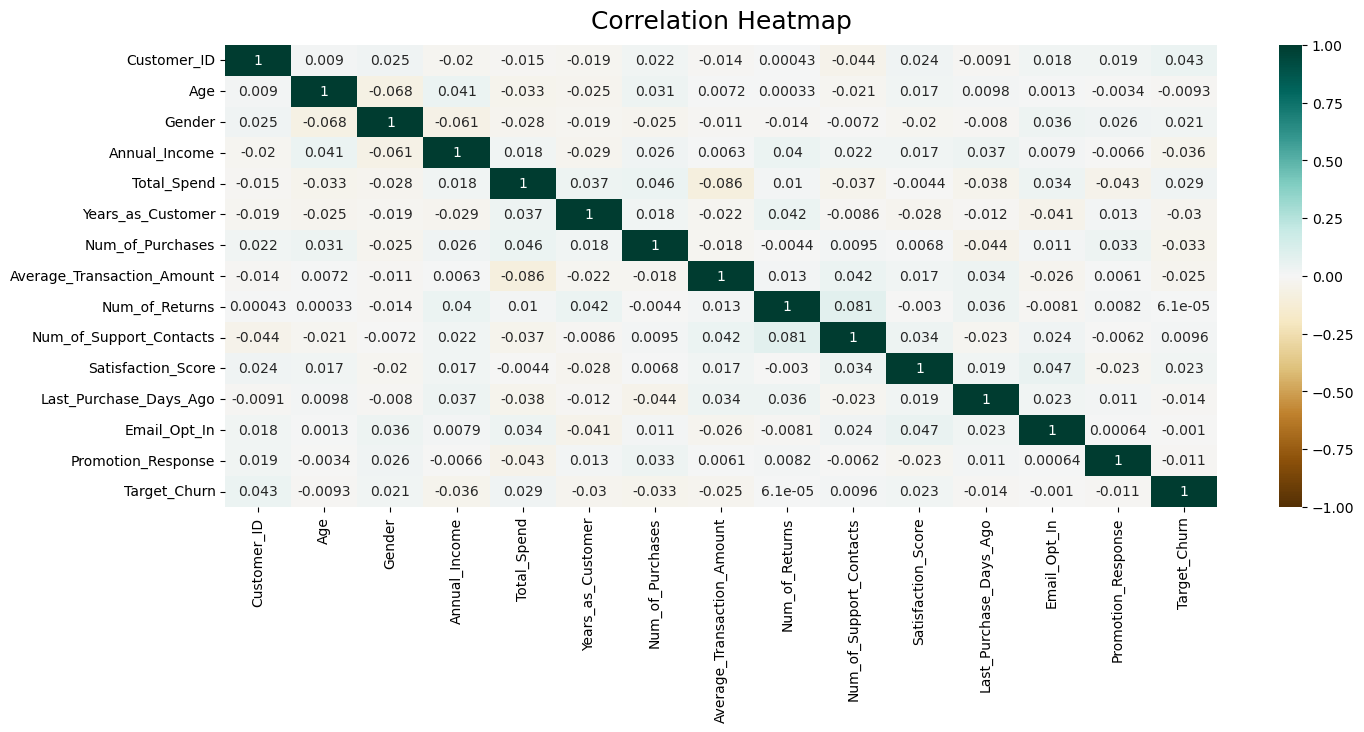

In [59]:
# sns.heatmap(cr);
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(cr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);


In [61]:
df.corr()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
Customer_ID,1.000000,0.008962,0.025165,-0.020463,-0.015484,-0.018746,0.021711,-0.014022,0.000433,-0.044346,0.024343,-0.009129,0.018373,0.018673,0.043034
Age,0.008962,1.000000,-0.067836,0.040689,-0.033285,-0.024781,0.031459,0.007184,0.000331,-0.021226,0.017408,0.009790,0.001283,-0.003399,-0.009260
Gender,0.025165,-0.067836,1.000000,-0.061088,-0.028145,-0.018586,-0.024866,-0.011475,-0.013539,-0.007158,-0.019795,-0.007964,0.035658,0.025800,0.020786
Annual_Income,-0.020463,0.040689,-0.061088,1.000000,0.017615,-0.028853,0.025921,0.006284,0.039609,0.022472,0.016590,0.036988,0.007855,-0.006622,-0.036322
Total_Spend,-0.015484,-0.033285,-0.028145,0.017615,1.000000,0.037125,0.045609,-0.086144,0.010103,-0.036756,-0.004413,-0.038241,0.033981,-0.043458,0.028659
Years_as_Customer,-0.018746,-0.024781,-0.018586,-0.028853,0.037125,1.000000,0.017676,-0.021645,0.042259,-0.008638,-0.027812,-0.011783,-0.040759,0.012557,-0.029823
Num_of_Purchases,0.021711,0.031459,-0.024866,0.025921,0.045609,0.017676,1.000000,-0.018408,-0.004420,0.009478,0.006799,-0.044072,0.010798,0.032858,-0.032772
Average_Transaction_Amount,-0.014022,0.007184,-0.011475,0.006284,-0.086144,-0.021645,-0.018408,1.000000,0.013257,0.042396,0.017337,0.034158,-0.025714,0.006122,-0.024723
Num_of_Returns,0.000433,0.000331,-0.013539,0.039609,0.010103,0.042259,-0.004420,0.013257,1.000000,0.080650,-0.003001,0.036108,-0.008129,0.008206,0.000061
Num_of_Support_Contacts,-0.044346,-0.021226,-0.007158,0.022472,-0.036756,-0.008638,0.009478,0.042396,0.080650,1.000000,0.033984,-0.023189,0.024169,-0.006188,0.009593


In [65]:
# Features. Here we are dropping target churn and keeping the other features.
X = df.drop(columns=["Target_Churn"])

# Y is the target column which we want to predict
y = df["Target_Churn"]

print(X.shape, y.shape)

(1000, 14) (1000,)


In [75]:
# standard scaler the data

# Here I'm ceating the object for the class.
scaler = StandardScaler()

# Here I'm using the .fit_transform method
X_scaled=scaler.fit_transform(X)

# Here I'm accessing the numpy array
X_scaled[0:5]

array([[-1.73031962,  1.22962809,  1.24771768, -1.26497333,  0.28377308,
        -0.85423954, -0.96237837,  1.28204967, -0.90211443, -1.37944388,
         0.01868945, -0.51648897,  0.94358845, -0.07394458],
       [-1.72685552,  1.42654712,  0.02206181, -0.61443362,  1.37892421,
         0.59148001,  0.96546292, -1.67335878, -0.90211443,  0.04707513,
         0.01868945,  0.42275615, -1.05978406, -0.07394458],
       [-1.72339142, -1.65851775,  0.02206181, -1.56714486, -1.55974944,
         0.59148001,  0.75515296, -1.48385324,  0.13400475,  0.04707513,
        -0.70013553,  0.95946764, -1.05978406, -0.07394458],
       [-1.71992731, -1.46159871,  1.24771768, -0.61216165,  1.40857787,
        -1.21566943, -0.57681012,  0.99419055,  0.13400475,  0.76033463,
         1.4563394 ,  0.41317201,  0.94358845, -1.30635422],
       [-1.71646321, -1.46159871,  1.24771768, -0.64945977,  0.10839593,
         0.9529099 , -0.22629352, -1.13639213, -0.55674137, -1.37944388,
         1.4563394 ,  0.56

In [81]:
# Here we will split the dataset for training
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

In [85]:
# Here we will fit a model
# Randomforrest

# Create object of randomforrest
rndforrest=RandomForestClassifier(random_state=43)

rndforrest.fit(X_train, y_train)

RandomForestClassifier(random_state=43)

In [87]:
y_pred=rndforrest.predict(X_test)

In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.50      0.39      0.44        94
        True       0.55      0.65      0.59       106

    accuracy                           0.53       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.53      0.53      0.52       200



In [105]:
print(confusion_matrix(y_test, y_pred))

[[37 57]
 [37 69]]


In [ ]:
# The model predicted 37 instances as True which was actually True (True Positive)

In [107]:
y_test
# among this 200 data, 100 is True, 100 False (Actual)
# Model predict (70 as True, 50 False) correc

521     True
737     True
740     True
660     True
411    False
       ...  
408    False
332    False
208    False
613    False
78     False
Name: Target_Churn, Length: 200, dtype: bool